In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Reading two csv files and combining them together
def read_data():
    path = r"E:\Metro1\artifacts\\"
    df1=pd.read_csv(path + "outputfile_1.csv")
    df2=pd.read_csv(path + "outputfile_2.csv")
    df3=pd.read_csv(path + "outputfile_3.csv")
    df4=pd.read_csv(path + "outputfile_4.csv")

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])
    df['VEHICLE']=np.where((df['CARS']==0) & (df['TWO_WHEELER']==0),0,1)
    df_park['VEHICLE']=np.where((df_park['CARS']==0) & (df_park['TWO_WHEELER']==0),0,1)
    return df,df_park
df,df_park=read_data()

In [3]:
def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return ACCESS_DIS
    elif ACCESS_DIS in [3,4]:
        return 3
    elif ACCESS_DIS in [5,6,7,8]:
        return 4
    elif ACCESS_DIS in [9,10,11]:
        return 5

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df['ACCESS_DIS_B'] = df['ACCESS_DIS'].apply(map_access_dis)



# convert all values of EGRESS_DIS into integers
df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return int(EGRESS_DIS)
    if EGRESS_DIS in [3,4]:
        return 3
    if EGRESS_DIS in [5,6,7,8]:
        return 4
    if EGRESS_DIS in [9,10,11]:
        return 5
    elif EGRESS_DIS in [0]:
        return 2
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


In [4]:
def map_age():
    age_mapping = {
    "18-25 yrs": 21.5,
    '> 60 yrs ':65,
    '36-45yrs ':40, 
    '36-45 yrs ':40, 
    '18-25 yrs ':22,
    '26-35 yrs ':30,
    '18-25yrs ':22,
    '26-35yrs ':30, 
    '46-60 yrs ':54,
      '46-60yrs ':54
    }

# Map the 'AGE' column to average values
    df['AGE'] = df['AGE'].map(age_mapping)
    df_park['AGE']=df_park['AGE'].map(age_mapping)

    return df,df_park

df,df_park=map_age()



In [5]:
def map_income():
       income_mapper={'>2 Lakhs':3, 'nan':0, '25,001 – 50,000':1, '1,00,001 – 2,00,000':3,
       '10,001 – 25,000':1, '50,001 – 1,00,000':2, '<=10,000':1}
       df['INCOME']=df.INCOME.map(income_mapper)
       df_park['INCOME']=df_park.INCOME.map(income_mapper)

       # print(df['INCOME'].value_counts())

       return df,df_park


In [6]:
access_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping ACCESS_M to above dictionary

df['A_M']=df['ACCESS_M'].map(access_map)



egress_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping EGRESS_M to above dictionary

df['E_M']=df['EGRESS_M'].map(egress_map)

In [7]:
# df,df_park=read_data()
df,df_park=map_income()
income_mapper={1:1,2:1,3:2,4:2,5:3,6:3}
df['INCOME_B']=df.INCOME.map(income_mapper)
df_park['INCOME_B']=df_park.INCOME.map(income_mapper)
print(df['INCOME_B'].value_counts())


1.0    821
2.0    347
Name: INCOME_B, dtype: int64


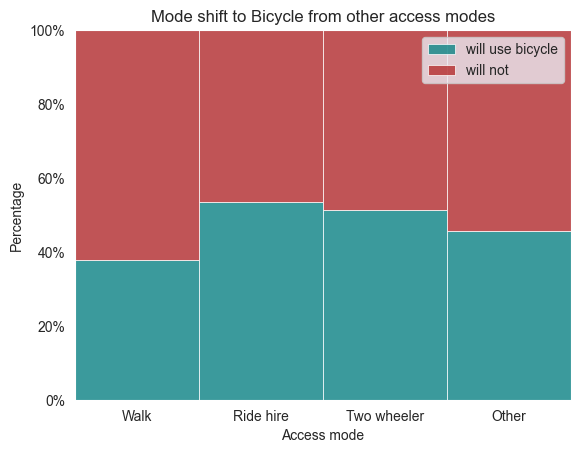

In [8]:
df1=df.copy()
a_m={1:1,3:1,4:2}

df1=df1[df1['RENT_BICYCLE']!=2]

# df1.reset_index(drop=True, inplace=True)

df1['RENT_BICYCLE']=df1['RENT_BICYCLE'].map(a_m)

# Reverse the order of the categories in the 'RENT_BICYCLE' column
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({1: 2, 2: 1})

df1=df1.loc[(df1['ACCESS_M']!=2) & (df1['ACCESS_M']!=4)]
sns.set_style('dark')
custom_palette = ['firebrick','teal']
# plt.figure(figsize=(6,6))

from matplotlib.ticker import FuncFormatter
ax=sns.histplot(data=df1, x='A_M', hue='RENT_BICYCLE', multiple='fill', palette=custom_palette, stat='percent',linewidth=0.5)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.title('Mode shift to Bicycle from other access modes')
plt.xlabel('Access mode')
plt.ylabel('Percentage')
plt.legend(['will use bicycle', 'will not'])
plt.show()

Next we see if this shift is based on income

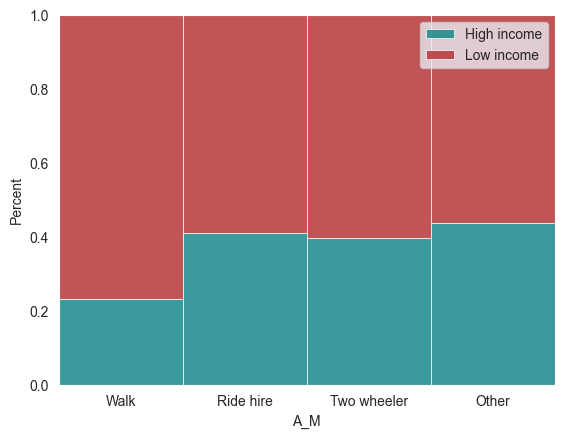

In [9]:
df2=df1.copy()
df2['INCOME_B'].dropna(inplace=True)
sns.histplot(data=df2, x='A_M',hue='INCOME_B',stat='percent',multiple='fill',palette=['firebrick','teal'],linewidth=0.5)
plt.legend(['High income','Low income'])

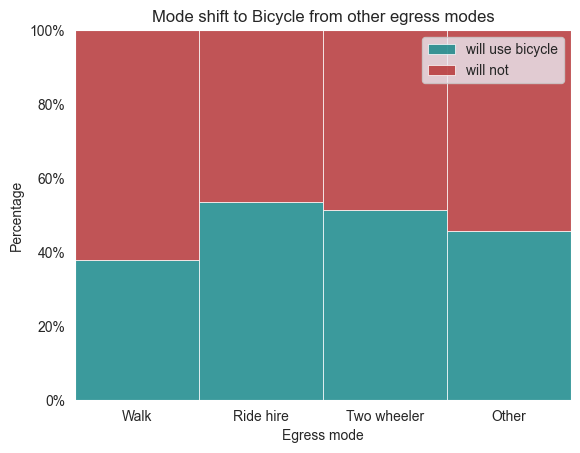

In [10]:
# drop na terms from df1 where income is na
df1['INCOME_B'].dropna(inplace=True)
from matplotlib.ticker import FuncFormatter
ax=sns.histplot(data=df1, x='A_M', hue='RENT_BICYCLE', multiple='fill', palette=custom_palette, stat='percent',linewidth=0.5)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.title('Mode shift to Bicycle from other egress modes')
plt.xlabel('Egress mode')
plt.ylabel('Percentage')
plt.legend(['will use bicycle', 'will not'])
plt.show()

Lets see the  shift for egress trips

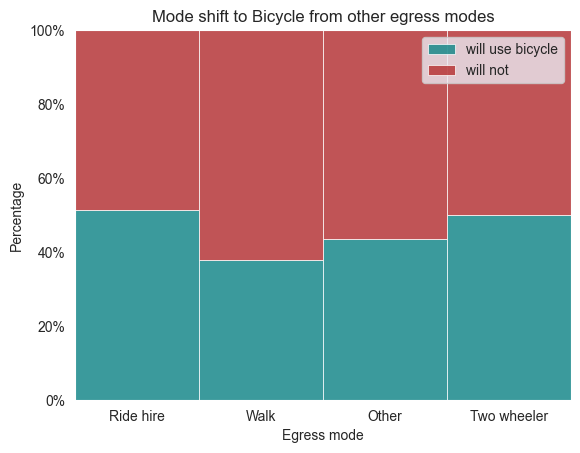

In [11]:
df1=df.copy()
a_m={2:1,3:1,4:2}
df1=df1[df1['RENT_BICYCLE']!=1]

df1.reset_index(drop=True, inplace=True)

df1['RENT_BICYCLE']=df1['RENT_BICYCLE'].map(a_m)

# Reverse the order of the categories in the 'RENT_BICYCLE' column
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({1: 2, 2: 1})

df1=df1.loc[(df1['EGRESS_M']!=2) & (df1['EGRESS_M']!=4)]
sns.set_style('dark')
custom_palette = ['firebrick','teal']
# plt.figure(figsize=(6,6))

from matplotlib.ticker import FuncFormatter

ax=sns.histplot(data=df1, x='E_M', hue='RENT_BICYCLE', multiple='fill', palette=custom_palette, stat='percent',linewidth=0.5)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.title('Mode shift to Bicycle from other egress modes')
plt.xlabel('Egress mode')
plt.ylabel('Percentage')
plt.legend(['will use bicycle', 'will not'])
plt.show()

We see if income has any effect

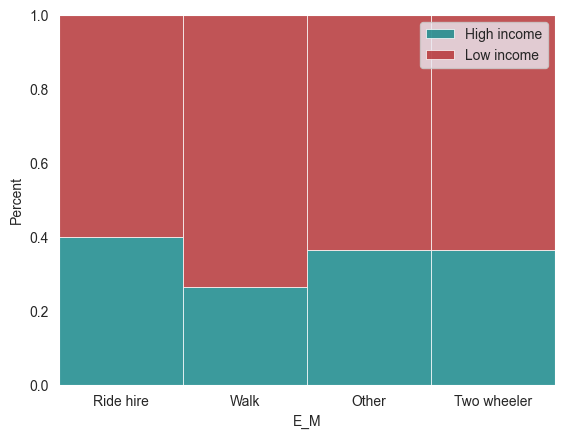

In [12]:
df2=df1.copy()
df2['INCOME_B'].dropna(inplace=True)
sns.histplot(data=df2, x='E_M',hue='INCOME_B',stat='percent',multiple='fill',palette=['firebrick','teal'],linewidth=0.5)
plt.legend(['High income','Low income'])

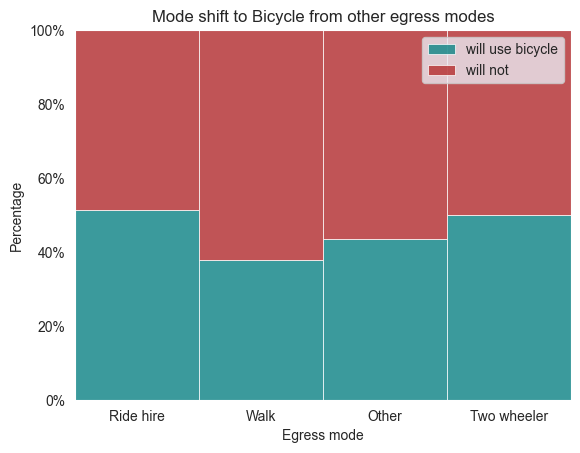

In [13]:
# drop na terms from df1 where income is na
df1['INCOME_B'].dropna(inplace=True)
from matplotlib.ticker import FuncFormatter
ax=sns.histplot(data=df1, x='E_M', hue='RENT_BICYCLE', multiple='fill', palette=custom_palette, stat='percent',linewidth=0.5)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.title('Mode shift to Bicycle from other egress modes')
plt.xlabel('Egress mode')
plt.ylabel('Percentage')
plt.legend(['will use bicycle', 'will not'])
plt.show()